In [7]:
from pydrever.data import (
    RevetmentZoneSpecification, 
    VerticalRevetmentZoneDefinition,
    NordicStoneLayerSpecification, 
    GrassWaveImpactLayerSpecification, 
    GrassWaveRunupLayerSpecification, 
    TopLayerType,
    )
from calculate_utils import read_schematization, get_outer_slope
import numpy as np

def get_schematized_location(profile_file_name:str, z_grass_zone:float, has_road:bool = False):
    profile = read_schematization(profile_file_name)
    n_grass_locations = 15
    n_stone_locations = 10
    
    nordic_stone_zone_definition = VerticalRevetmentZoneDefinition(
        z_min=min(profile.z_positions), 
        z_max=z_grass_zone, 
        nz=n_stone_locations,
        include_schematization_coordinates=True)
    nordic_stone_top_layer = NordicStoneLayerSpecification(
        top_layer_type=TopLayerType.NordicStone, 
        top_layer_thickness=0.4, 
        relative_density=2400)
    nordic_stone_zone = RevetmentZoneSpecification(zone_definition=nordic_stone_zone_definition, top_layer_specification=nordic_stone_top_layer)

    grass_wave_impact_top_layer = GrassWaveImpactLayerSpecification(top_layer_type=TopLayerType.GrassClosedSod)
    grass_wave_runup_top_layer = GrassWaveRunupLayerSpecification(top_layer_type=TopLayerType.GrassClosedSod, outer_slope=get_outer_slope(profile))
    grass_zone_definition = VerticalRevetmentZoneDefinition(
        z_min=z_grass_zone,
        z_max=max(profile.z_positions), 
        nz=n_grass_locations,
        include_schematization_coordinates=True)
    grass_wave_impact_zone = RevetmentZoneSpecification(zone_definition=grass_zone_definition, top_layer_specification=grass_wave_impact_top_layer)
    grass_wave_runup_zone = RevetmentZoneSpecification(zone_definition=grass_zone_definition, top_layer_specification=grass_wave_runup_top_layer)

    return profile, nordic_stone_zone, grass_wave_impact_zone, grass_wave_runup_zone



In [8]:
import matplotlib.pyplot as plt

def plot_schematized_info(profile_name:str, z_grass_zone:float, has_road:bool = False):
    profile_file_name = "Locatie" + profile_name + "_AHN.prfl"
    profile, nordic_stone_zone, grass_wave_impact_zone, grass_wave_runup_zone = get_schematized_location(profile_file_name, z_grass_zone, has_road)
    print(profile.z_positions)
    fig, axs = plt.subplots(ncols=1, nrows=1)
    fig.suptitle("Profiel " + profile_name)
    axs.set_facecolor("#F2F2F2")
    axs.plot(profile.x_positions, profile.z_positions, "#FF960D", zorder=1, marker="o", markersize=8, label="Profiel " + profile_file_name + " - AHN")

    i_outer_toe = profile.x_positions.index(profile.x_outer_toe)
    i_outer_crest = profile.x_positions.index(profile.x_outer_crest)
    i_inner_toe = profile.x_positions.index(profile.x_inner_toe)
    i_inner_crest = profile.x_positions.index(profile.x_inner_crest)

    axs.scatter(
        profile.x_outer_toe,
        profile.z_positions[i_outer_toe],
        s=100,
        zorder=2,
        marker="o",
        c="#080C80",
        edgecolors="k",
        label="Buitenteen",
    )
    axs.scatter(
        profile.x_outer_crest, profile.z_positions[i_outer_crest], s=100, zorder=3, marker="o", c="#00B389", edgecolors="k", label="Buitenkruin"
    )
    axs.scatter(
        profile.x_inner_crest,
        profile.z_positions[i_inner_crest],
        s=100,
        zorder=3,
        marker="o",
        c="#00E6A1",
        edgecolors="k",
        label="Binnenkruin",
    )
    axs.scatter(
        profile.x_inner_toe, profile.z_positions[i_inner_toe], s=100, zorder=3, marker="o", c="#0EBBF0", edgecolors="k", label="Binnenteen"
    )

    nordic_stone_locations = nordic_stone_zone.get_output_locations(profile)
    x_nodic_stone = [l.x_position for l in nordic_stone_locations]
    z_nodic_stone = [np.interp(l.x_position, profile.x_positions, profile.z_positions) for l in nordic_stone_locations]
    axs.plot(x_nodic_stone, z_nodic_stone, c="gray", linewidth=6, zorder=-1, label="Steenzone")
    axs.plot(x_nodic_stone, z_nodic_stone, marker='x', c="k", linewidth=0, zorder=4)

    grass_wave_impact_locations = grass_wave_impact_zone.get_output_locations(profile)
    x_grass = [l.x_position for l in grass_wave_impact_locations]
    z_grass = [np.interp(l.x_position, profile.x_positions, profile.z_positions) for l in grass_wave_impact_locations]
    axs.plot(x_grass, z_grass, c="green", linewidth=6, zorder=-1, label="Graszone")
    axs.plot(x_grass, z_grass, marker='x', c="k", linewidth=0, zorder=4)

    axs.grid(True, color="#E6E6E6")
    axs.set(ylabel="Hoogte [m+NAP]", xlabel="Afstand [m]")
    axs.set_axisbelow(True)
    axs.legend()

[-0.2, 5.2, 6.8, 6.8, 1.7999999999999998]
[-1.9, 0.1, 3.1, 3.9, 6.3, 6.3, 1.2999999999999998]
[-0.6, 0.5, 3.4, 3.6, 5.3, 5.3, 0.2999999999999998]


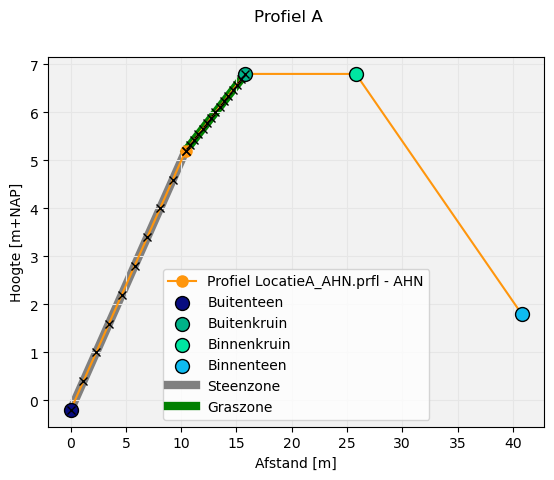

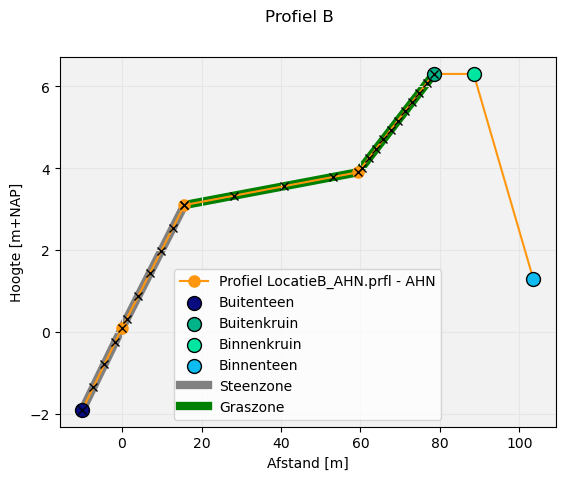

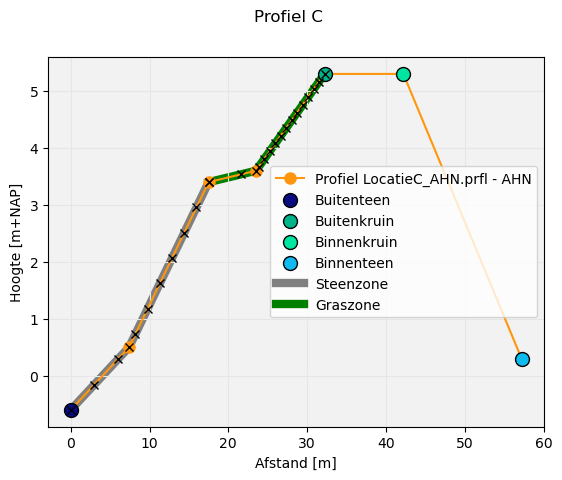

In [9]:

profiles = [
    ["A", 5.2],
    ["B", 3.1],
    ["C", 3.4],
]

for pr in profiles:
    plot_schematized_info(pr[0], pr[1], False)